In [1]:
import pandas as pd

In [29]:
# Loading the dataset
ruta_del_archivo = '/home/ernestosantiago/code/ErnestoSantiago23/deteccion_de_autismo/data/csv/Toddler Autism dataset July 2018.csv'
data = pd.read_csv(ruta_del_archivo, header=0, index_col=0)

In [3]:
num_filas, num_columnas = data.shape

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 1054
Número de columnas: 18


In [4]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
Case_No,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
data['Class/ASD Traits '].value_counts()

Class/ASD Traits 
Yes    728
No     326
Name: count, dtype: int64

In [6]:
#Eliminar las columnas de:
#Qchat-10-Score
#Ethnicity
#Jaundice
#Who completed the text
#y convertir el resto en binario para revisar al final la colinealidad.

In [7]:
tipos_de_datos = data.dtypes

# Imprime los tipos de datos para cada columna
print("Tipos de datos en el DataFrame:")
print(tipos_de_datos)

Tipos de datos en el DataFrame:
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object


In [8]:
print(data.columns)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [9]:
columnas_elim=['Qchat-10-Score', 'Ethnicity', 'Jaundice', 'Who completed the test']
data_1= data.drop(columnas_elim, axis=1)

In [10]:
print("DataFrame después de eliminar columnas:")
print(data_1)

DataFrame después de eliminar columnas:
         A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons Sex  \
Case_No                                                          
1         0   0   0   0   0   0   1   1   0    1        28   f   
2         1   1   0   0   0   1   1   0   0    0        36   m   
3         1   0   0   0   0   0   1   1   0    1        36   m   
4         1   1   1   1   1   1   1   1   1    1        24   m   
5         1   1   0   1   1   1   1   1   1    1        20   f   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ..   
1050      0   0   0   0   0   0   0   0   0    1        24   f   
1051      0   0   1   1   1   0   1   0   1    0        12   m   
1052      1   0   1   1   1   1   1   1   1    1        18   m   
1053      1   0   0   0   0   0   0   1   0    1        19   m   
1054      1   1   0   0   1   1   0   1   1    0        24   m   

        Family_mem_with_ASD Class/ASD Traits   
Case_No                                        
1    

In [11]:
#convertir en 0 y 1 las siguientes features
#Sex   
#Family_mem_with_ASD               

In [12]:
data_1['Sex'] = data_1['Sex'].map({'f': 0, 'm': 1})
print("\nDataFrame después de la conversión:")
print(data_1)


DataFrame después de la conversión:
         A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  \
Case_No                                                           
1         0   0   0   0   0   0   1   1   0    1        28    0   
2         1   1   0   0   0   1   1   0   0    0        36    1   
3         1   0   0   0   0   0   1   1   0    1        36    1   
4         1   1   1   1   1   1   1   1   1    1        24    1   
5         1   1   0   1   1   1   1   1   1    1        20    0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ...   
1050      0   0   0   0   0   0   0   0   0    1        24    0   
1051      0   0   1   1   1   0   1   0   1    0        12    1   
1052      1   0   1   1   1   1   1   1   1    1        18    1   
1053      1   0   0   0   0   0   0   1   0    1        19    1   
1054      1   1   0   0   1   1   0   1   1    0        24    1   

        Family_mem_with_ASD Class/ASD Traits   
Case_No                                    

In [13]:
data_1['Family_mem_with_ASD'] = data_1['Family_mem_with_ASD'].str.strip().map({'no': 0, 'yes': 1})
# Muestra el DataFrame después de la conversión
print("\nDataFrame después de la conversión:")
print(data_1)


DataFrame después de la conversión:
         A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  \
Case_No                                                           
1         0   0   0   0   0   0   1   1   0    1        28    0   
2         1   1   0   0   0   1   1   0   0    0        36    1   
3         1   0   0   0   0   0   1   1   0    1        36    1   
4         1   1   1   1   1   1   1   1   1    1        24    1   
5         1   1   0   1   1   1   1   1   1    1        20    0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ...   
1050      0   0   0   0   0   0   0   0   0    1        24    0   
1051      0   0   1   1   1   0   1   0   1    0        12    1   
1052      1   0   1   1   1   1   1   1   1    1        18    1   
1053      1   0   0   0   0   0   0   1   0    1        19    1   
1054      1   1   0   0   1   1   0   1   1    0        24    1   

         Family_mem_with_ASD Class/ASD Traits   
Case_No                                   

In [14]:
data_1['Class/ASD Traits '] = data_1['Class/ASD Traits '].str.strip().map({'No': 0, 'Yes': 1})
# Muestra el DataFrame después de la conversión
print("\nDataFrame después de la conversión:")
print(data_1)


DataFrame después de la conversión:
         A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  \
Case_No                                                           
1         0   0   0   0   0   0   1   1   0    1        28    0   
2         1   1   0   0   0   1   1   0   0    0        36    1   
3         1   0   0   0   0   0   1   1   0    1        36    1   
4         1   1   1   1   1   1   1   1   1    1        24    1   
5         1   1   0   1   1   1   1   1   1    1        20    0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ...   
1050      0   0   0   0   0   0   0   0   0    1        24    0   
1051      0   0   1   1   1   0   1   0   1    0        12    1   
1052      1   0   1   1   1   1   1   1   1    1        18    1   
1053      1   0   0   0   0   0   0   1   0    1        19    1   
1054      1   1   0   0   1   1   0   1   1    0        24    1   

         Family_mem_with_ASD  Class/ASD Traits   
Case_No                                  

In [15]:
#No es necesario estandarizar.

In [16]:
import numpy as np

In [17]:
bins = [12, 18, 24, 30, 37]
labels = [0, 1, 2, 3]

In [18]:
data_1['Month'] = pd.cut(data_1['Age_Mons'], bins=bins, labels=labels, right=False)

In [19]:
data_1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Family_mem_with_ASD,Class/ASD Traits,Month
Case_No,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28,0,0,0,2
2,1,1,0,0,0,1,1,0,0,0,36,1,0,1,3
3,1,0,0,0,0,0,1,1,0,1,36,1,0,1,3
4,1,1,1,1,1,1,1,1,1,1,24,1,0,1,2
5,1,1,0,1,1,1,1,1,1,1,20,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,1,24,0,1,0,2
1051,0,0,1,1,1,0,1,0,1,0,12,1,0,1,0
1052,1,0,1,1,1,1,1,1,1,1,18,1,0,1,1


In [20]:
data_2= data_1.drop(['Age_Mons'], axis=1)

In [21]:
data_2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Family_mem_with_ASD,Class/ASD Traits,Month
Case_No,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,0,0,0,2
2,1,1,0,0,0,1,1,0,0,0,1,0,1,3
3,1,0,0,0,0,0,1,1,0,1,1,0,1,3
4,1,1,1,1,1,1,1,1,1,1,1,0,1,2
5,1,1,0,1,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,1,0,1,0,2
1051,0,0,1,1,1,0,1,0,1,0,1,0,1,0
1052,1,0,1,1,1,1,1,1,1,1,1,0,1,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
X = data_2.drop('Class/ASD Traits ', axis=1) 
y = data_2['Class/ASD Traits ']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



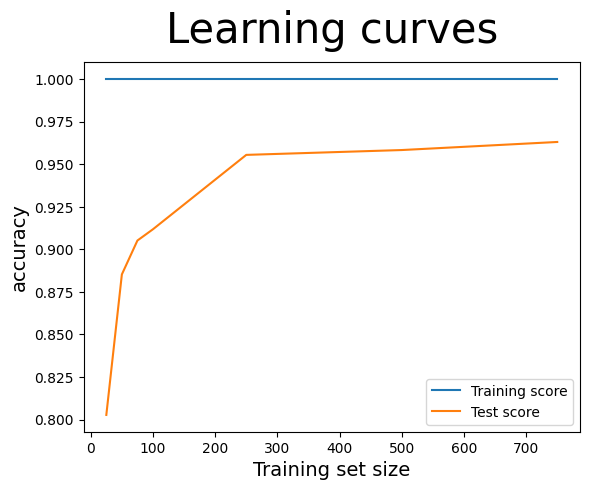

In [41]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes = [25,50,75,100,250,500,750]

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf, X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 30, y = 1.03)
plt.legend()

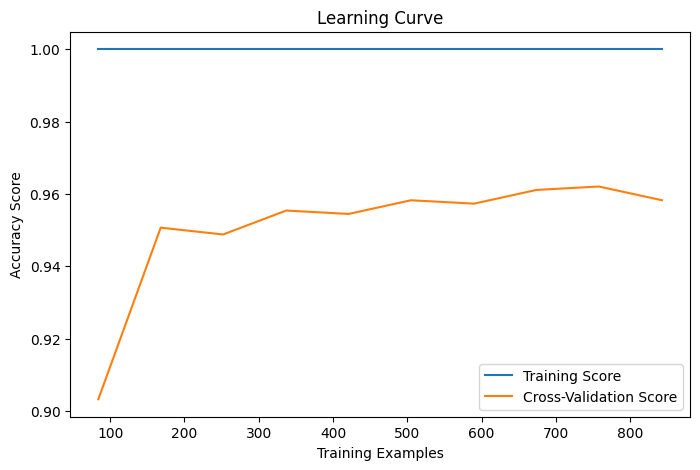

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

plot_learning_curve(clf, X, y)